# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 1

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
from torchviz import make_dot

In [3]:
from plots.chapter1 import figure1, figure3

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [9]:
true_b = 1
true_w = 2
N = 100

# Data generation
rng = np.random.default_rng()
x = rng.random(N)
epsilon = rng.standard_normal(N) * .1
y = true_b + true_w * x + epsilon

### Cell 1.1

In [10]:
# Shuffle the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Use the first 80 random indices for train
train_idx = idx[:int(N * .8)]
# Use the remaining indices for validation
val_idx = idx[int(N * .8):]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

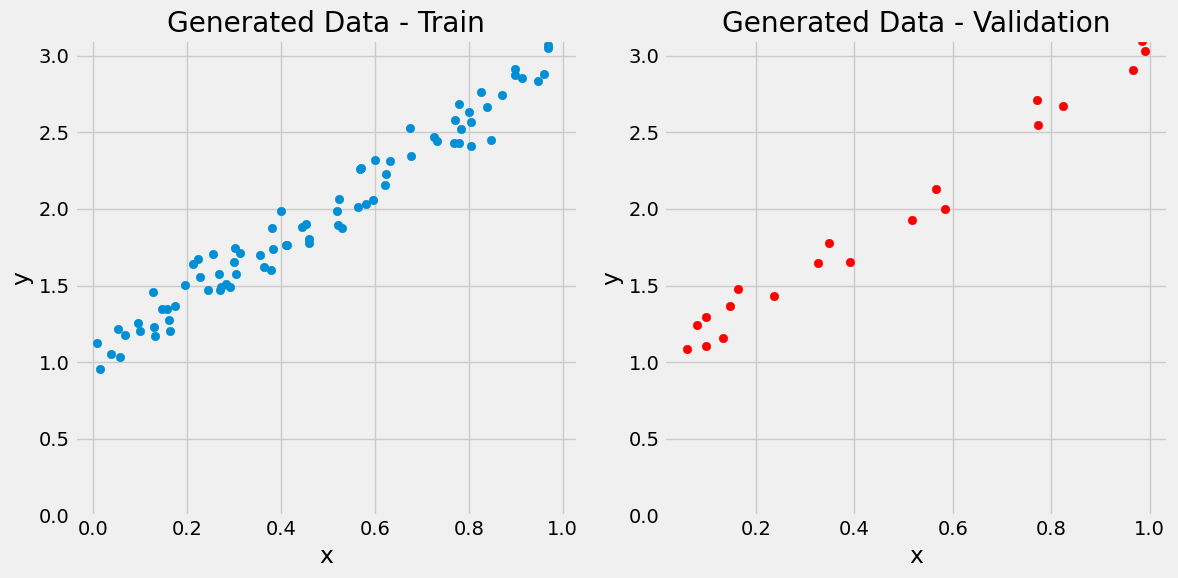

In [6]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step 0: Random Initialization

In [7]:
# Step 0 - Initialize parameters 'b' and 'w' randomly
rng = np.random.default_rng()
b = rng.random(1)[0]
w = rng.random(1)[0]

print(f'{b = :.4f}, {w = :.4f}')

b = 0.0300, w = 0.1485


## Step 1: Compute Model's Predictions

In [8]:
# Step 1 - Compute our model's predictions - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [9]:
# Step 2 - Compute the loss

# We are using ALL data points, so this is BATCH gradient descent.
# How wrong is our model? That's the error.
error = yhat - y_train

# It is a regression, so it computes MSE
loss = (error ** 2).mean()

print(f'{loss = :.4f}')

loss = 3.7188


## Step 3: Compute the Gradients

In [10]:
# Step 3 - Compute gradients for both 'b' and 'w' parameters
grad_b = 2 * error.mean()
grad_w = 2 * (x_train * error).mean()
print(f'{grad_b = :.4f}, {grad_w = :.4f}')

grad_b = -3.7083, grad_w = -2.0550


## Step 4: Update the Parameters

In [11]:
# Set learning rate, this is "eta"
lr = 0.1

print(f'{b = :.4f}, {w = :.4f}')

# Step 4 - Update parameters using gradients and the learning rate
b = b - lr * grad_b
w = w - lr * grad_w

print(f'Updated:\n{b = :.4f}, {w = :.4f}')

b = 0.0300, w = 0.1485
Updated:
b = 0.4008, w = 0.3540


## Step 5: Rinse and Repeat

In [12]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

### Cell 1.2

In [13]:
# Step 0 - Initialize parameters 'b' and 'w' randomly
rng = np.random.default_rng()
b = rng.random(1)[0]
w = rng.random(1)[0]

print(f'Initial: {b = :f}, {w = :f}')

# Set learning rate, this is "eta"
lr = 0.1
# Set number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute our model's predictions - forward pass
    yhat = b + w * x_train

    # Step 2 - Compute the loss
    error = yhat - y_train
    loss = (error ** 2).mean()

    # Step 3 - Compute gradients for both 'b' and 'w' parameters
    grad_b = 2 * error.mean()
    grad_w = 2 * (x_train * error).mean()

    # Step 4 - Update parameters using gradients and the learning rate
    b = b - lr * grad_b
    w = w - lr * grad_w

    if epoch < 15 or (epoch + 1) % 100 == 0 and (epoch + 1) % 1000 !=0:
        print(f'{epoch + 1}th update: {b = :f}, {w = :f}')

print(f'Final: {b = :f}, {w = :f}')

Initial: b = 0.940918, w = 0.924884
1th update: b = 1.055894, w = 0.996421
2th update: b = 1.141086, w = 1.052668
3th update: b = 1.203903, w = 1.097388
4th update: b = 1.249912, w = 1.133410
5th update: b = 1.283302, w = 1.162860
6th update: b = 1.307219, w = 1.187340
7th update: b = 1.324029, w = 1.208051
8th update: b = 1.335512, w = 1.225899
9th update: b = 1.343005, w = 1.241565
10th update: b = 1.347513, w = 1.255561
11th update: b = 1.349791, w = 1.268272
12th update: b = 1.350407, w = 1.279989
13th update: b = 1.349788, w = 1.290931
14th update: b = 1.348255, w = 1.301261
15th update: b = 1.346048, w = 1.311105
100th update: b = 1.127678, w = 1.757970
200th update: b = 1.047561, w = 1.915810
300th update: b = 1.026020, w = 1.958249
400th update: b = 1.020228, w = 1.969659
500th update: b = 1.018671, w = 1.972727
600th update: b = 1.018252, w = 1.973552
700th update: b = 1.018139, w = 1.973774
800th update: b = 1.018109, w = 1.973834
900th update: b = 1.018101, w = 1.973850
Fina

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

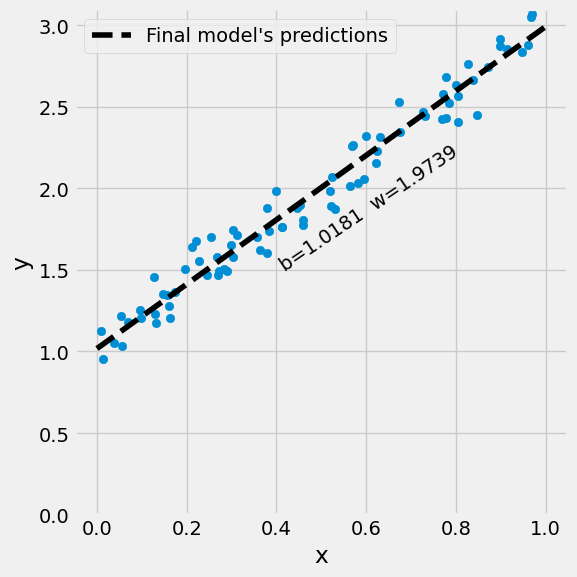

In [14]:
figure3(b, w, x_train, y_train)

In [15]:
# Sanity Check: do we get the same results as our gradient descent?
linr = LinearRegression()
linr.fit(x_train.reshape(-1, 1), y_train)
print(linr.intercept_, linr.coef_[0])

1.0180980482921962 1.9738557594116335


# PyTorch

## Tensor

## Loading Data, Devices and CUDA

### Defining your device

### Cell 1.3

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors 
# and then we send them to the chosen device.
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

## Creating Parameters

### Cell 1.4

In [21]:
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b)
print(w)

tensor([0.1940], device='cuda:0', requires_grad=True)
tensor([0.1391], device='cuda:0', requires_grad=True)


# Autograd

## backward

### Cell 1.5

In [24]:
# Step 1 - Compute model's predictions - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Compute the loss
# We are using ALL data points, so this is BATCH gradient descent
error = yhat - y_train_tensor
loss = (error ** 2).mean()  # MSE

# Step 3 - Compute gradients for both "b" and "w" parameters
# No more manual computation of gradients!
loss.backward()

## grad

In [25]:
print(b.grad)
print(w.grad)

tensor([-3.4540], device='cuda:0')
tensor([-2.0114], device='cuda:0')


## zero_

In [18]:
# This code will be placed *after* Step 4 (updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

## Updating Parameters

### Cell 1.6

In [31]:
# Set learning rate - this is eta
lr = 0.1

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predictions - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Compute the loss
    # We are using ALL data points, so this is BATCH gradient descent. 
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()  # MSE
    
    # Step 3 - Compute gradients for both "b" and "w" parameters
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # Step 4 - Update parameters using gradients and the learning rate
    # FIRST ATTEMPT - just using the same code as before
    # TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'
    # b = b - lr * b.grad
    # w = w - lr * w.grad

    # SECOND ATTEMPT - using in-place Python assigment
    # RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.
    # b -= lr * b.grad
    # w -= lr * w.grad

    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of the gradient computation. 
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad

    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()

print(b)
print(w)

tensor([0.9719], device='cuda:0', requires_grad=True)
tensor([2.0522], device='cuda:0', requires_grad=True)


## no_grad

In [ ]:
# This is what we used in the THIRD ATTEMPT...

# Dynamic Computation Graph

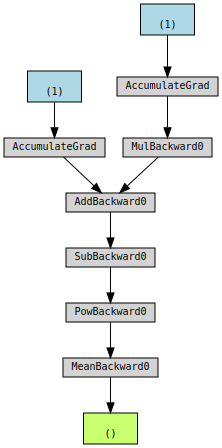

In [33]:
# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - Compute model's predictions - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Compute the loss
# We are using ALL data points, so this is BATCH gradient descent. 
error = yhat - y_train_tensor
loss = (error ** 2).mean()  # MSE

# We can try plotting the graph for any python variable: 
# yhat, error, loss...
make_dot(yhat)  # from torchviz import make_dot

# Optimizer

## step / zero_grad

In [38]:
# Define a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([b, w], lr=lr)

### Cell 1.7

In [39]:
# Set learning rate - this is eta
lr = 0.1

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Define a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([b, w], lr=lr)

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predictions - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Compute the loss
    # We are using ALL data points, so this is BATCH gradient descent. 
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()  # MSE

    # Step 3 - Compute gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Update parameters using gradients and the learning rate
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()

    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()

print(b)
print(w)

tensor([0.9719], device='cuda:0', requires_grad=True)
tensor([2.0522], device='cuda:0', requires_grad=True)


# Loss

In [40]:
# Define a MSE loss function
loss_fn = torch.nn.MSELoss(reduction='mean')  # nn stands for neural network

# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])

loss_fn(predictions, labels)

tensor(1.1700)

### Cell 1.8

In [12]:
# Set learning rate - this is eta
lr = 0.1

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Define a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([b, w], lr=lr)

# Define a MSE loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predictions - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Compute the loss
    # We are using ALL data points, so this is BATCH gradient descent. 
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Compute gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Update parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()

print(b)
print(w)

tensor([1.0028], device='cuda:0', requires_grad=True)
tensor([2.0090], device='cuda:0', requires_grad=True)


In [42]:
loss

tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>)

In [43]:
loss.cpu().numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [46]:
loss.detach().cpu().numpy()

array(0.0106975, dtype=float32)

In [47]:
print(loss.item())
print(loss.tolist())

0.010697497986257076
0.010697497986257076


# Model

### Cell 1.9

In [19]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model, we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float, device=device))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float, device=device))

    def forward(self, x):
        # Compute the predictions
        return self.b + self.w * x

## Parameters

In [20]:
torch.manual_seed(42)
# Create a dummpy instance of our ManualLinearRegression model
dummy = ManualLinearRegression().to(device)
dummy.parameters()

<generator object Module.parameters at 0x79a08c6caa40>

In [21]:
list(dummy.parameters())

[Parameter containing:
 tensor([0.1940], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1391], device='cuda:0', requires_grad=True)]

## state_dict

In [22]:
dummy.state_dict()

OrderedDict([('b', tensor([0.1940], device='cuda:0')),
             ('w', tensor([0.1391], device='cuda:0'))])

In [23]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

## Forward Pass

### Cell 1.10

In [24]:
# Set learning rate - this is eta
lr = 0.1

# Step 0 - Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
model = ManualLinearRegression().to(device)

# Define a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Define a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train()  # What is this?

    # Step 1 - Compute model's predictions - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)

    # Step 2 - Compute the loss
    # We are using ALL data points, so this is BATCH gradient descent. 
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Compute gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Update parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()

# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict({'b': tensor([1.0028], device='cuda:0'), 'w': tensor([2.0090], device='cuda:0')})


## train

In [ ]:
## Never forget to include model.train() in your training loop!

## Nested Models

In [27]:
linear = nn.Linear(1, 1).to(device)
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]], device='cuda:0')),
             ('bias', tensor([0.2018], device='cuda:0'))])

### Cell 1.11

In [28]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

In [29]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

## Sequential Models

### Cell 1.12

In [30]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

## Layers

In [31]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [32]:
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2062], device='cuda:0'))])

# Putting It All Together

## Data Preparation

### Data Preparation V0

In [42]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Writing data_preparation/v0.py


In [43]:
%run -i data_preparation/v0.py

In [52]:
x_train_tensor.shape

torch.Size([80])

In [53]:
y_train_tensor.shape

torch.Size([80])

## Model Configurtion

### Model Configuration V0

In [44]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set learning rate - this is eta
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Define a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Define a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [45]:
%run -i model_configuration/v0.py

In [51]:
print(model.state_dict())

OrderedDict({'0.weight': tensor([[0.7645]], device='cuda:0'), '0.bias': tensor([0.8300], device='cuda:0')})


## Model Training

### Model Training V0

In [65]:
%%writefile model_training/v0.py

# Define number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Set model to TRAIN mode
    model.train()

    # Step 1 - Compute model's predictions - forward pass
    yhat = model(x_train_tensor.reshape(-1, 1))

    # Step 2 - Compute the loss
    loss = loss_fn(yhat, y_train_tensor.reshape(-1, 1))

    # Step 3 - Compute gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Update parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()

Overwriting model_training/v0.py


In [66]:
%run -i model_training/v0.py

In [67]:
print(model.state_dict())

OrderedDict({'0.weight': tensor([[2.0090]], device='cuda:0'), '0.bias': tensor([1.0028], device='cuda:0')})
